# Clustering (Unsupervised Learning)

## Content

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

Problem Statement You own the mall and want to understand the customers like who can be easily converge [Target Customers](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) so that the sense can be given to marketing team and plan the strategy accordingly. 


## Description
- Understanding my Data
- Data Visualization
- K-mean Clustering
   - Age Vs Score_spending
   - Income Vs Score_spending
- Hierarchical Clustering
   - Income Vs Score_spending

## Understanding my Data

In [1]:
#import some useful libraries
%matplotlib inline
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.cluster import KMeans 
from matplotlib import style
style.use("ggplot")

In [2]:
#import the data
df=pd.read_csv("mall.csv")

In [3]:
#the dimensions of the DataFrame
df.shape

(200, 5)

In [4]:
#the name of each column
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
#data type per column
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
#check out for null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
#rename some columns for my facilitation
df=df.rename(columns={"Annual Income (k$)": "Income","Spending Score (1-100)":"Score_spending"})

In [8]:
#some useful measurements
df.describe()

,CustomerID,Age,Income,Score_spending
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
#print the fisrt 10 rows of my data
df.head(10)

,CustomerID,Gender,Age,Income,Score_spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## Data Visualization

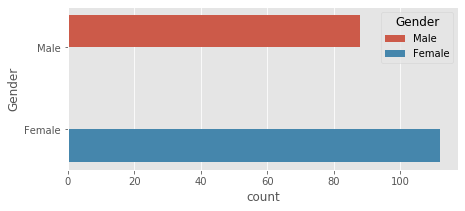

In [10]:
#count by Gender
plt.figure(1 , figsize = (7 ,3))
sns.countplot(y = 'Gender' , data = df,hue="Gender")
plt.show()

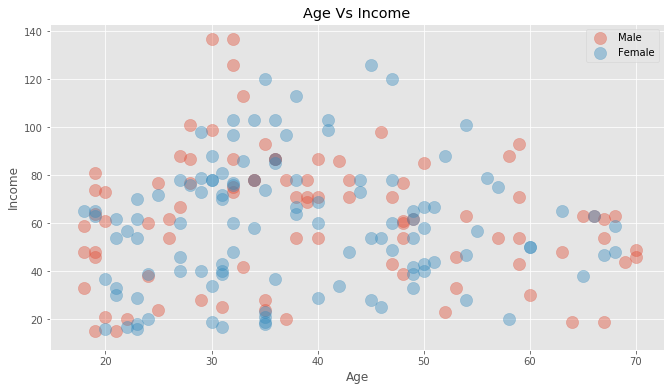

In [11]:
#Age Vs Income
plt.figure(1 , figsize = (11 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Income' , data = df[df['Gender'] == gender] ,s = 150 , alpha = 0.4 , label = gender)
plt.xlabel('Age'), plt.ylabel('Income') 
plt.title('Age Vs Income')
plt.legend()
plt.show()

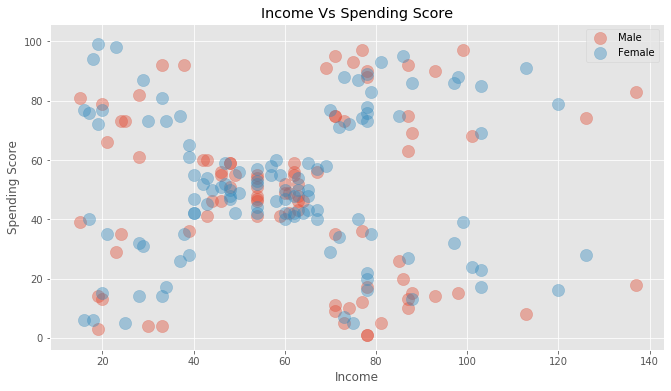

In [12]:
#Income Vs Spending Score
plt.figure(1 , figsize = (11 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Income',y = 'Score_spending' ,data = df[df['Gender'] == gender] ,s = 150 , alpha = 0.4 , label = gender)
plt.xlabel('Income'), plt.ylabel('Spending Score') 
plt.title('Income Vs Spending Score')
plt.legend()
plt.show()

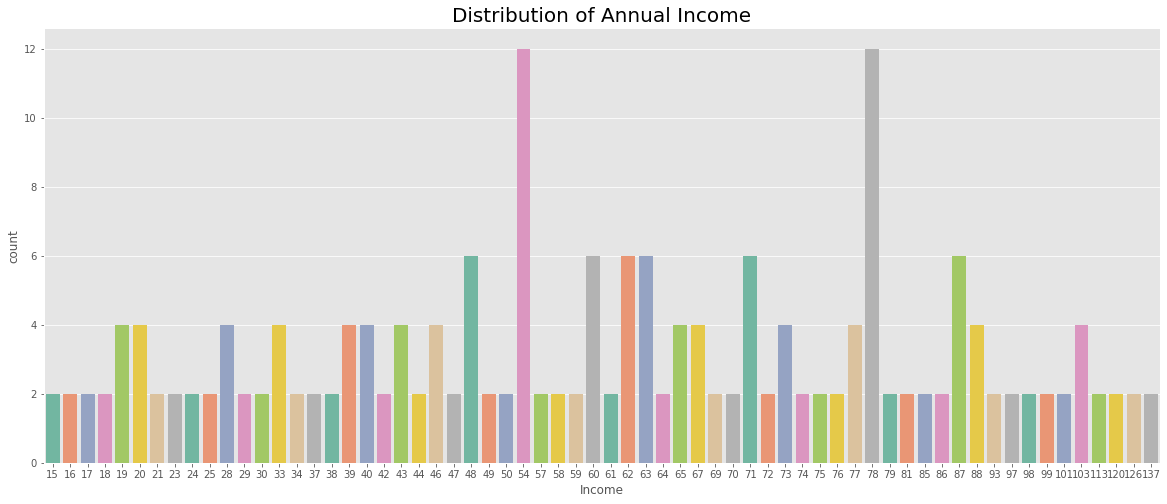

In [13]:
#Distribution of Annual Income
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(df['Income'], palette = 'Set2')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

## K-mean Clustering

### 1. Age Vs Score_spending

#### Comment
I am going to  apply K-mean algorithm to find out the diffirent clusters of my data.For example  the customers are seperated as usual customers,target customers(high income),target customer (low income),Priority customers.From inertia plot i understand the number of k that is the best for my dataset(find the elbow point where the rate of decrease sharply shifts).Sometimes it is profitable to apply Normalization to the data.

In [14]:
X=df.Age
Y=df.Score_spending

In [15]:
X = np.array( list(zip(X,Y)) )

In [16]:
kmeans=KMeans(n_clusters=4,init="k-means++",n_init=12)


In [17]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
centroids=kmeans.cluster_centers_
print(centroids)

[[27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [43.29166667 15.02083333]]


In [19]:
labels=kmeans.labels_

In [20]:
print(labels)

[0 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 0 0 3 1 0 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3
 1 3 1 2 1 2 0 3 0 2 0 0 0 2 0 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2
 2 0 2 0 0 2 2 0 2 2 0 2 2 0 0 2 2 0 2 0 0 0 2 0 2 0 0 2 2 0 2 0 2 2 2 2 2
 0 0 0 0 0 2 2 2 2 0 0 0 1 0 1 2 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 2 1
 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1 3 1 3 0 3 1 3 1 3 1 3 1 3 1 3 1 3 1 0
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


With pink are the usual customers ,with red are the priority customers and with yellow and green are the target customers with low and high income respectively

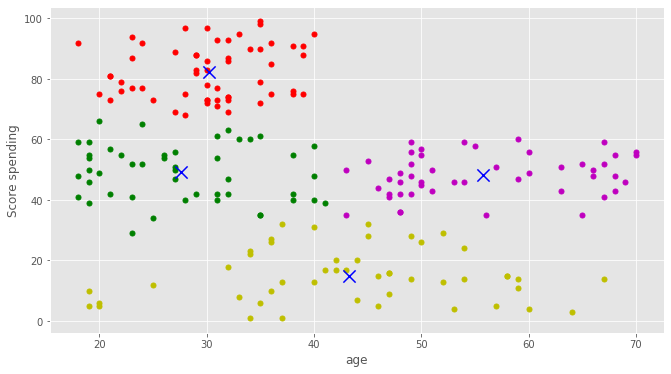

In [21]:

#the vizualization of clustering with k=4
plt.figure(1 , figsize = (11 , 6))
colors=["g.","r.","m.","y."]
for i in range(len(X)):
    #print(X[i],labels[i])
    plt.plot(X[i][0],X[i][1],colors[labels[i]],markersize=10)
plt.scatter(centroids[:,0],centroids[:,1],marker="x",s=150,linewidths=5,zorder=10,color="blue")
plt.xlabel("age")
plt.ylabel("Score spending")
plt.show()

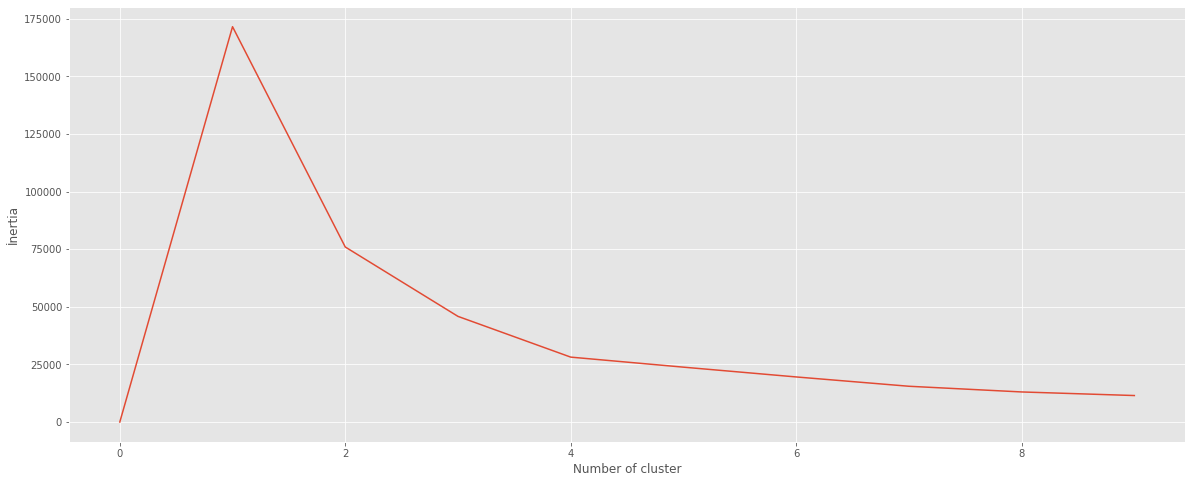

In [22]:
#inertia to choose the k 
#evaluation
inertia_list=np.empty(10)
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    inertia_list[i]=kmeans.inertia_

plt.plot(range(0,10),inertia_list)
plt.xlabel("Number of cluster")
plt.ylabel("İnertia")
plt.show()

### Income Vs Score_spending



In [23]:
XX=df.Income
YY=df.Score_spending

In [24]:
XX = np.array( list(zip(XX,YY)) )

In [25]:
kmeans=KMeans(n_clusters=5,init="k-means++",n_init=12)

In [26]:
kmeans.fit(XX)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
centroids=kmeans.cluster_centers_
print(centroids)

[[86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [55.2962963  49.51851852]]


In [28]:
labels=kmeans.labels_

In [29]:
print(labels)

[3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 4 3 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 0 2 0 4 0 2 0 2 0 4 0 2 0 2 0 2 0 2 0 4 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


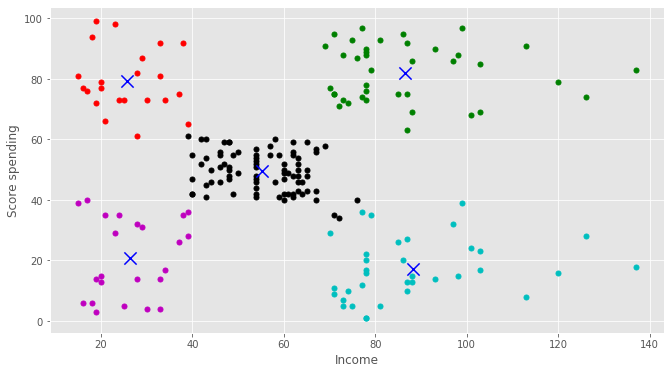

In [30]:
#income Vs score
plt.figure(1 , figsize = (11 , 6))
colors=["g.","r.","c.","m.","k."]
for i in range(len(X)):
    #print(X[i],labels[i])
    plt.plot(XX[i][0],XX[i][1],colors[labels[i]],markersize=10)
plt.scatter(centroids[:,0],centroids[:,1],marker="x",s=150,linewidths=5,zorder=10,color="blue")
plt.xlabel("Income")
plt.ylabel("Score spending")
plt.show()

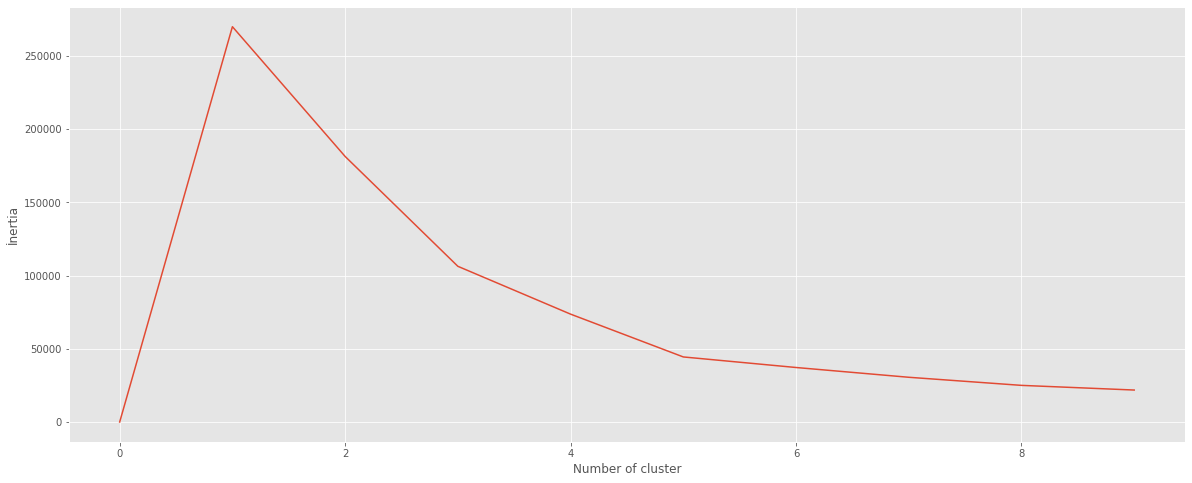

In [31]:
#inertia to choose the k 
#evaluation
inertia_list=np.empty(10)
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(XX)
    inertia_list[i]=kmeans.inertia_

plt.plot(range(0,10),inertia_list)
plt.xlabel("Number of cluster")
plt.ylabel("İnertia")
plt.show()

## Hierarchical Clustering

### Income Vs Score spending

#### Comment
I use data like income and score spending.I use Agglomerative Hierarchical Clustering that related to create the Dendrogram from down to up (the oppossite is called Divisive Hierarchical Clustering).A well the distance was calculated by Euclidean distance and ward method.To find out how many cluster i have to my dataset go to the dendrogram and i look fot the largest distance that we can vertically without crossing any horizontal line.The output is the same as the k-mean method.Some of advanatages of this method is that does not require to define the numbers of clusters and the main disadvantage is that i can not undo any previous steps throughout the algorithm.

In [38]:
#chose the values of income and score spending
x = df.iloc[:, [3, 4]].values

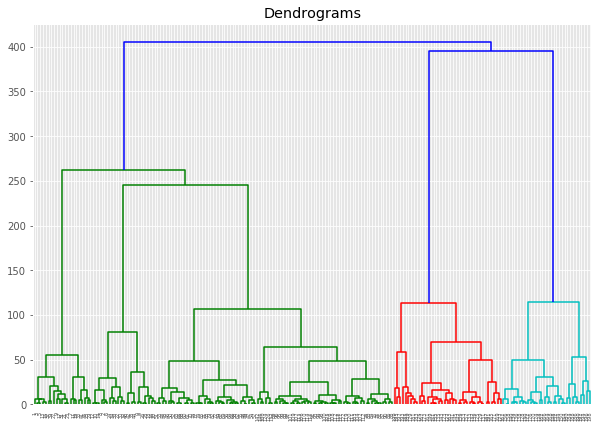

In [40]:
#apply  dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(x, method='ward'))

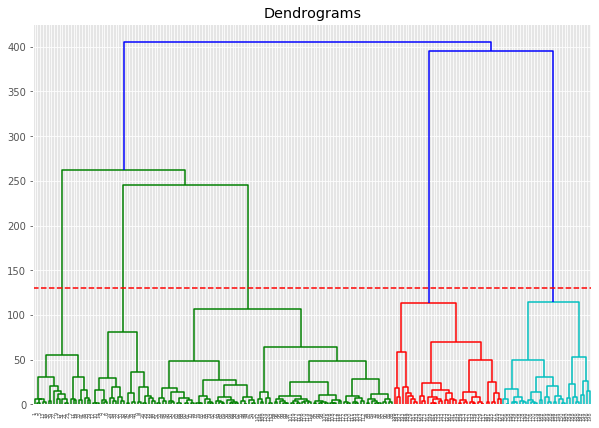

In [41]:
#understanding how many clusters exists
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(x, method='ward'))
plt.axhline(y=130, color='r', linestyle='--')

In [42]:
#Fitting hierarchical clustering to my data
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
#find the cluster
y_hc=cluster.fit_predict(x)


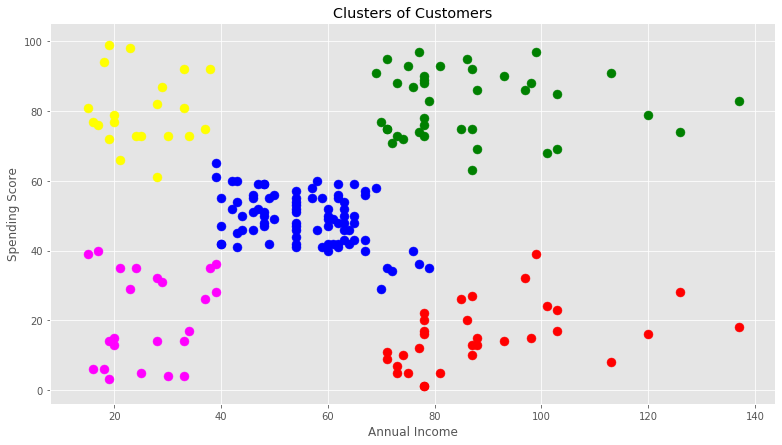

In [43]:
#Visualize the clusters
plt.figure(figsize=(13, 7)) 
plt.scatter(x[y_hc==0, 0], x[y_hc==0, 1], s=80, c='red')
plt.scatter(x[y_hc==1, 0], x[y_hc==1, 1], s=80, c='blue')
plt.scatter(x[y_hc==2, 0], x[y_hc==2, 1], s=80, c='green')
plt.scatter(x[y_hc==3, 0], x[y_hc==3, 1], s=80, c='yellow')
plt.scatter(x[y_hc==4, 0], x[y_hc==4, 1], s=80, c='magenta')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()